In [1]:
import juliacall
from juliacall import Main as jl
import json
import numpy as np
import pandas as pd
from pathlib import Path

[juliapkg] Locating Julia ^1.7
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] Using Julia 1.7.1 at /home/nlp/.local/bin/julia
[juliapkg] Using Julia project at /home/nlp/anaconda3/envs/bertology/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.add([Pkg.PackageSpec(name="CairoMakie", uuid="13f3f980-e62b-5c42-98c6-ff1f3baf88f0"), Pkg.PackageSpec(name="Distributions", uuid="31c24e10-a181-5473-b8eb-7969acd0382f"), Pkg.PackageSpec(name="Colors", uuid="5ae59095-9a9b-59fe-a467-6f913c188581"), Pkg.PackageSpec(name="ColorSchemes", uuid="35d6a980-a343-548e-a6ea-1d62b119f2f4"), Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d")])
           julia> Pkg.resolve()


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/anaconda3/envs/bertology/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/bertology/julia_env/Manifest.toml`
  No Changes to `~/anaconda3/envs/bertology/julia_env/Project.toml`
  No Changes to `~/anaconda3/envs/bertology/julia_env/Manifest.toml`


In [2]:
juliacall.using(locals(), "CairoMakie")
juliacall.using(locals(), "CairoMakie", 'lines! scatter! hidespines! linkaxes! linkyaxes! linkxaxes!', rename=lambda x: x.replace("!", "___"))
juliacall.using(locals(), "CairoMakie", 'hidedecorations! hidexdecorations! hideydecorations! xticks!', rename=lambda x: x.replace("!", "___"))
juliacall.using(locals(), "Distributions")
juliacall.using(locals(), "CairoMakie", 'plot! scatter!', rename=lambda x: x.replace("!", "__"))
juliacall.using(locals(), 'Colors')
juliacall.using(locals(), 'ColorSchemes')

In [3]:
rob_df_path = "../mlm_tests/output/clean_hidden_generation_tests/roberta-base_[77, 588]_generation_all_tokens_in_a_row.csv"
bert_df_path = "../mlm_tests/output/clean_hidden_generation_tests/bert-base-uncased_[308, 381]_generation_all_tokens_in_a_row.csv"
rob_df = pd.read_csv(rob_df_path, dtype={"tokens":str, "gen_toks":str, "freq_change":int, "abs_change":int, "real_freq":int, "gen_freq":int})
bert_df = pd.read_csv(bert_df_path, dtype={"tokens":str, "gen_toks":str, "freq_change":int, "abs_change":int, "real_freq":int, "gen_freq":int})

In [4]:
rob_real_freqs = np.sort(np.unique(rob_df.tokens.astype(str).values, return_counts=True)[1])[::-1]
rob_gen_freqs = np.sort(np.unique(rob_df.gen_toks.astype(str).values, return_counts=True)[1])[::-1]
bert_real_freqs = np.sort(np.unique(bert_df.tokens.astype(str).values, return_counts=True)[1])[::-1]
bert_gen_freqs = np.sort(np.unique(bert_df.gen_toks.astype(str).values, return_counts=True)[1])[::-1]

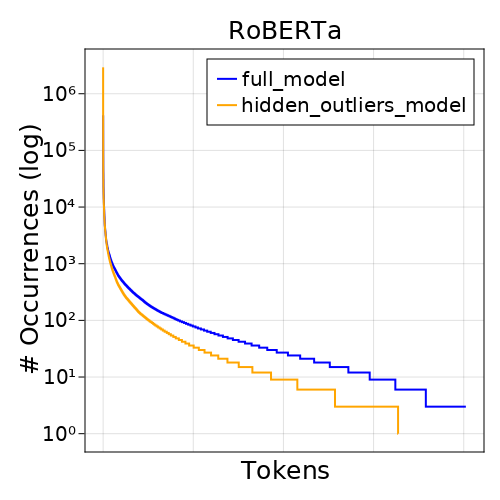

In [6]:
fig1 = jlCairoMakie.Figure(resolution=(500, 500))
fig2 = jlCairoMakie.Figure(resolution=(500, 500))
ax1 = jlCairoMakie.Axis(fig1[1,1], yscale=jl.log10)
ax2 = jlCairoMakie.Axis(fig2[1,1], yscale=jl.log10)
for idx, (name, real_freqs, gen_freqs) in enumerate([("roberta-base", rob_real_freqs, rob_gen_freqs), ("bert-base-uncased", bert_real_freqs, bert_gen_freqs)]):

    c1 = "blue" if "roberta" in name else "dodgerblue"
    c2 = "orange" if "roberta" in name else "orangered"

    ax = ax1 if idx == 0 else ax2

    lines___(ax, real_freqs, label="full_model", color=c1, linewidth=2)
    lines___(ax, gen_freqs, label="hidden_outliers_model", color=c2, linewidth=2)

    ax.xlabel = "Tokens"
    hidexdecorations___(ax, label = False, ticklabels = True, ticks = True, grid = False,
    minorgrid = False, minorticks = False)
    

    jlCairoMakie.axislegend(ax, labelsize=20)
    ax.title = "RoBERTa" if "roberta" in name else "BERT"
    ax.titlesize = 20

    layout = fig1[1,1] if idx == 0 else fig2[1,1]

hideydecorations___(ax2, label = True, ticklabels = True, ticks = False, grid = False,
    minorgrid = False, minorticks = False)
linkyaxes___(ax1, ax2)
ax1.ylabel = "# Occurrences (log)"
ax1.ylabelsize = 25
ax1.xlabelsize = 25
ax1.titlesize = 25
ax1.yticklabelsize = 20

ax2.ylabelsize = 25
ax2.xlabelsize = 25
ax2.yticklabelsize = 20
roberta_outdir = Path("../overleaf/hacking_outlier_features/restiled_plots/roberta-base/")
roberta_outdir.mkdir(exist_ok=True, parents=True)
bert_outdir = Path("../overleaf/hacking_outlier_features/restiled_plots/bert-base-uncased/")
bert_outdir.mkdir(exist_ok=True, parents=True)
jlCairoMakie.save(str(roberta_outdir / "pretrained_vs_broken_token_generation_freqs.png"), fig1)
jlCairoMakie.save(str(bert_outdir / "pretrained_vs_broken_token_generation_freqs.png"), fig2)
fig1

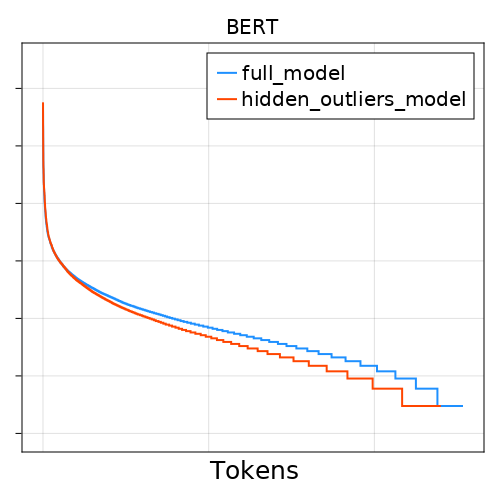

In [ ]:
fig2